# Exercise 8
# Clustering

## <b>Problem Description</b>
To perform clustering using k-means, k-medoids and agglomerative methods

### 1. K Means

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### 2. K Medoids

In [2]:
import numpy as np
from sklearn.cluster import KMeans

######################### K-Medoids

def assign_nearest(ids_of_mediods):
    dists = dist(x[:,None,:], x[None,ids_of_mediods,:])
    return np.argmin(dists, axis=1)


def dist(xa, xb):
    if EUCLIDEAN:
        return np.sqrt(np.sum(np.square(xa-xb), axis=-1))
    else:
        return np.sum(np.abs(xa - xb), axis=-1)


def find_medoids(assignments):
    medoid_ids = np.full(k, -1, dtype=int)
    subset = np.random.choice(n, batch_sz, replace=False)

    for i in range(k):
        indices = np.intersect1d(np.where(assignments==i)[0], subset)
        distances = dist(x[indices, None, :], x[None, indices, :]).sum(axis=0)
        medoid_ids[i] = indices[np.argmin(distances)]

    return medoid_ids


def kmeds(iterations=20):
    print("Initializing to random medoids.")
    ids_of_medoids = np.random.choice(n, k, replace=False)
    class_assignments = assign_nearest(ids_of_medoids)

    for i in range(iterations):
        print("\tFinding new medoids.")
        ids_of_medoids = find_medoids(class_assignments)
        print("\tReassigning points.")
        new_class_assignments = assign_nearest(ids_of_medoids)

        diffs = np.mean(new_class_assignments != class_assignments)
        class_assignments = new_class_assignments

        print("iteration {:2d}: {:.2%} of points got reassigned."
              "".format(i, diffs))
        if diffs <= 0.01:
            break

    return class_assignments, ids_of_medoids


######################### Generate Fake Data
print("Initializing Data.")
d = 3
k = 6
n = k * 1000000
batch_sz = 1000
x = np.random.normal(size=(n, d))
EUCLIDEAN = False

print("n={}\td={}\tk={}\tbatch_size={} ".format(n, d, k, batch_sz))
print("Distance metric: ", "Eucledian" if EUCLIDEAN else "Manhattan")

print("\nMaking k-groups as:")
for kk in range(k):
    dd = (kk-1)%d
    print("    x[{}:{}, {}] += {}".format(kk*n//k, (kk+1)*n//k, dd , 3*d*kk))
    x[kk*n//k:(kk+1)*n//k,dd] += 3*d*kk

######################### Fitting
print("\nFitting Kmedoids.")
final_assignments, final_medoid_ids = kmeds()

print("\nFitting Kmeans from Scikit-Learn")
fit = KMeans(n_clusters=k).fit(x)
kmeans_assignments = fit.labels_
kmeans = fit.cluster_centers_

mismatch = np.zeros((k, k))
for i, m in (zip(final_assignments, kmeans_assignments)):
    mismatch[i, m] += 1

np.set_printoptions(suppress=True)
print("\nKMedoids:")
print(x[final_medoid_ids, ])
print("K-Medoids class sizes:")
print(mismatch.sum(axis=-1))
print("\nKMeans:")
print(kmeans)
print("K-Means class sizes:")
print(mismatch.sum(axis=0))
print("\nMismatch between assignment to Kmeans and Kmedoids:")
print(mismatch)
print("Should ideally be {} * a permutation matrix.".format(n//k))

Initializing Data.
n=6000000	d=3	k=6	batch_size=1000 
Distance metric:  Manhattan

Making k-groups as:
    x[0:1000000, 2] += 0
    x[1000000:2000000, 0] += 9
    x[2000000:3000000, 1] += 18
    x[3000000:4000000, 2] += 27
    x[4000000:5000000, 0] += 36
    x[5000000:6000000, 1] += 45

Fitting Kmedoids.
Initializing to random medoids.
	Finding new medoids.
	Reassigning points.
iteration  0: 16.00% of points got reassigned.
	Finding new medoids.
	Reassigning points.
iteration  1: 0.71% of points got reassigned.

Fitting Kmeans from Scikit-Learn

KMedoids:
[[-0.60612191 45.14779493 -0.03217662]
 [ 8.85849871 -0.30200808 -0.15378769]
 [-0.21859602  1.42113585 -0.00259564]
 [ 0.09383698 -0.06620665 27.2910921 ]
 [ 0.53464463 45.13614272  0.15450471]
 [35.89015332  0.08452618  0.37228623]]
K-Medoids class sizes:
[ 487042. 1000118. 1999882. 1000000.  512958. 1000000.]

KMeans:
[[35.99847299 -0.00093059 -0.00111718]
 [ 9.00092632 -0.00164236 -0.00010067]
 [ 0.00069047 45.00008233  0.00081331

### 3. Agglomerative Clustering


matplotlib : For displaying plots<br>
scipy.cluster.hierarchy : Fittting models and displaying dendograms<br>
scipy.spatial.distance : For calculating distance<br>
scipy.preprocesing : For calculating distance<br>
Matplotlib : For displaying plots<br>
Matplotlib : For displaying plots<br>

In [3]:
# Header Files
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn import datasets
import numpy as np
import pandas as pd

In [4]:
# Loading the standard IRIS dataset
iris = datasets.load_iris()
dataIRIS = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [5]:
dataIRIS.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
# Normalises the data
# Setting mean as 0 and standard deviation as 1

dataScaled = scale(dataIRIS.iloc[:,:4])
dataScaled = pd.DataFrame(dataScaled, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
dataScaled.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


The Euclidean distances are calculated and placed on a distance matrix

In [7]:
distances = pdist(dataScaled, metric='euclidean')
DistMatrix = squareform(distances)
DistMatrix

array([[0.        , 1.18212094, 0.84856711, ..., 3.80606726, 3.82448796,
        3.33620324],
       [1.18212094, 0.        , 0.52549943, ..., 3.74544575, 4.01679443,
        3.21249253],
       [0.84856711, 0.52549943, 0.        , ..., 3.93572117, 4.07138458,
        3.37976603],
       ...,
       [3.80606726, 3.74544575, 3.93572117, ..., 0.        , 1.07582215,
        0.77518629],
       [3.82448796, 4.01679443, 4.07138458, ..., 1.07582215, 0.        ,
        1.20421099],
       [3.33620324, 3.21249253, 3.37976603, ..., 0.77518629, 1.20421099,
        0.        ]])

The Scaled data is visualized using the ward method

### 3.1 Ward Linkage

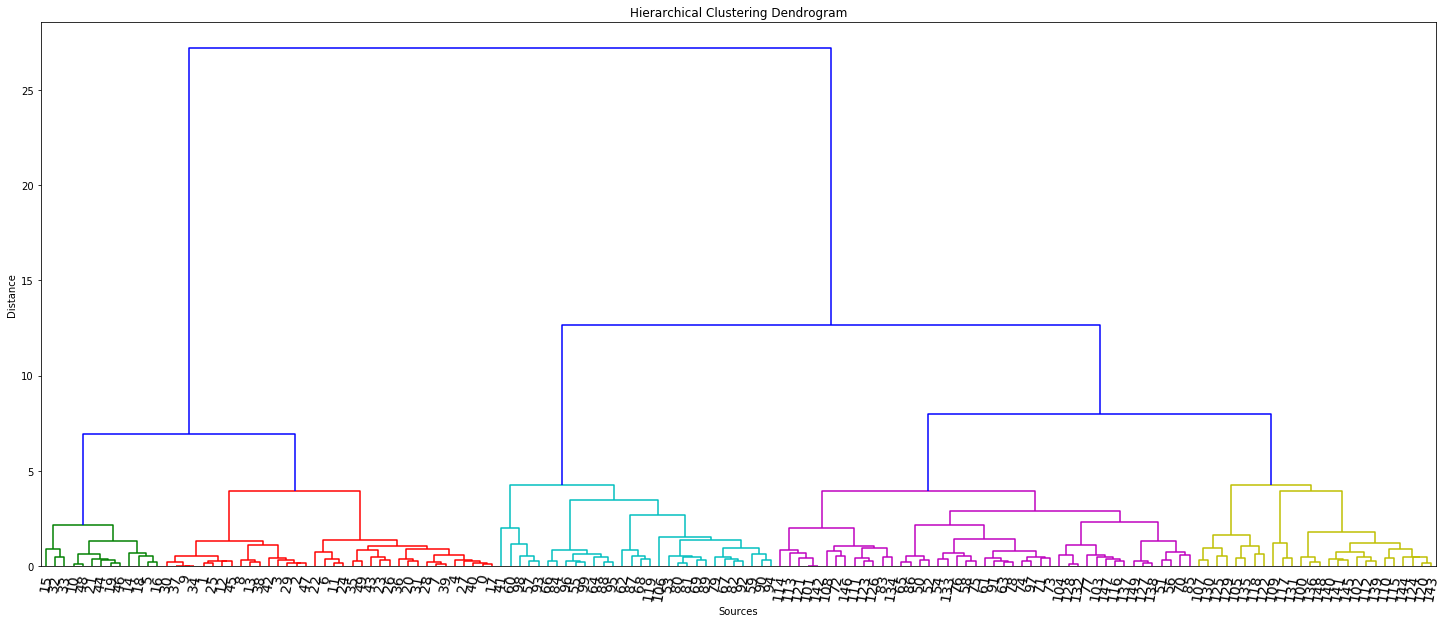

In [8]:
# Fitting our model.
cluster_tree = linkage(dataScaled, 'ward')

# Ploting our dendrogram.
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sources')
plt.ylabel('Distance')

dendrogram(cluster_tree, leaf_rotation=80., leaf_font_size=14.,  color_threshold=5)
plt.show()

### 3.2 Complete Linkage

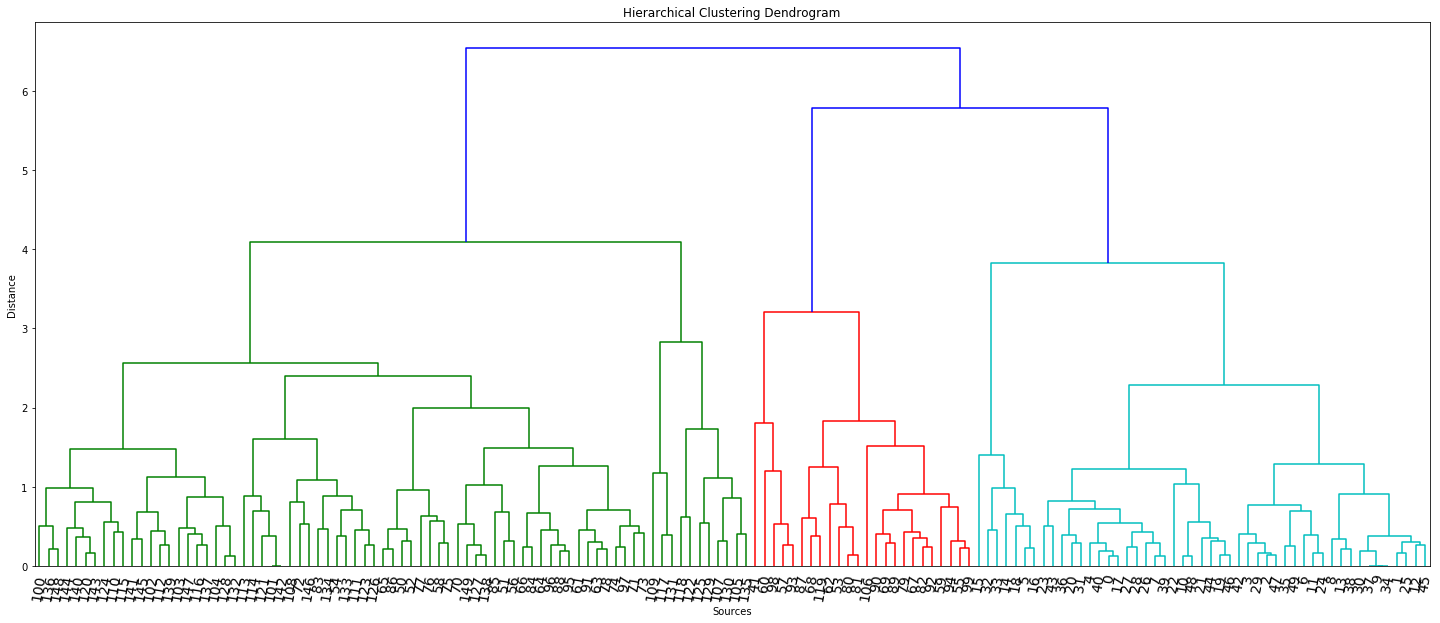

In [9]:
# Fitting our model.
cluster_tree = linkage(dataScaled, 'complete')

# Ploting our dendrogram.
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sources')
plt.ylabel('Distance')

dendrogram(cluster_tree, leaf_rotation=80., leaf_font_size=14.,  color_threshold=5)
plt.show()

### 3.3 Average Linkage

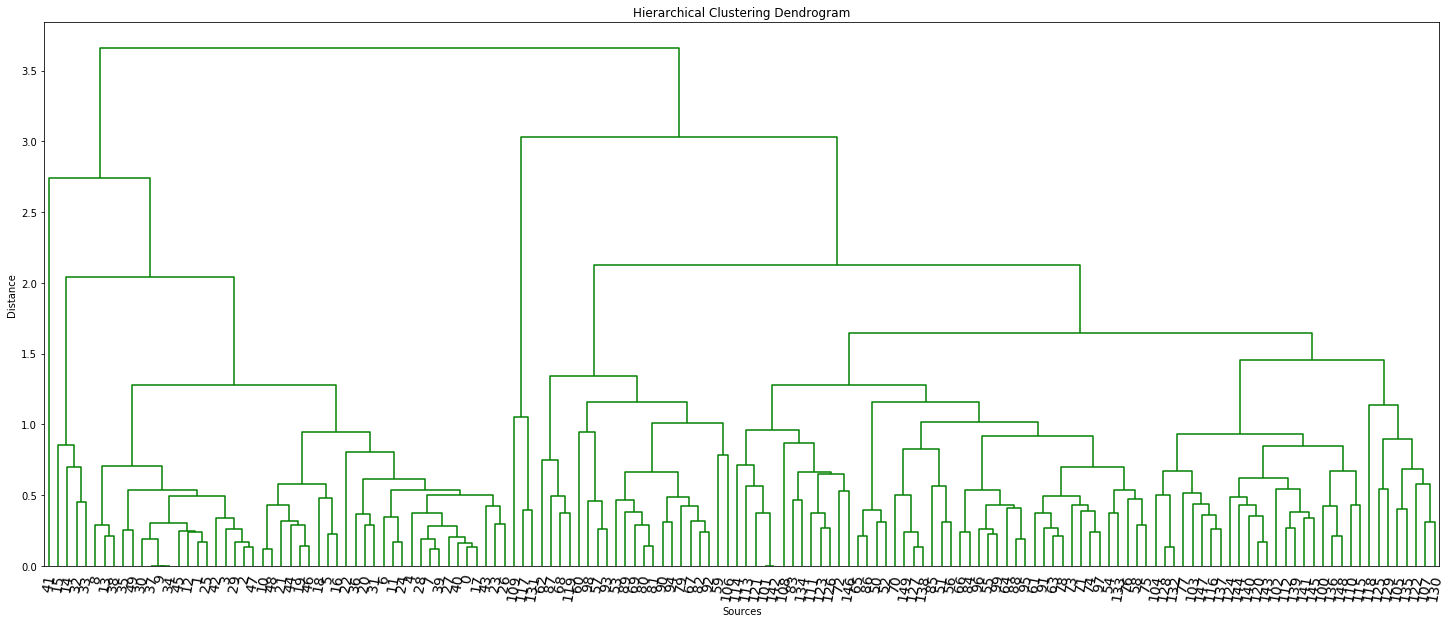

In [10]:
# Fitting our model.
cluster_tree = linkage(dataScaled, 'average')

# Ploting our dendrogram.
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sources')
plt.ylabel('Distance')

dendrogram(cluster_tree, leaf_rotation=80., leaf_font_size=14.,  color_threshold=5)
plt.show()

The corresponding clusters of each row

In [11]:
max_distance = 4.5
clusters = fcluster(cluster_tree, max_distance, criterion='distance')

# Another way to fit the data
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(dataScaled)
clusters

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       4, 2, 4, 2, 4, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 3, 1, 0, 1, 3, 1,
       1, 3, 1, 3, 3, 1, 3, 1, 1, 0, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int64)

In [12]:
dataIRIS['cluster'] = clusters
dataIRIS.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0.0,2
1,4.9,3.0,1.4,0.2,0.0,2
2,4.7,3.2,1.3,0.2,0.0,2
3,4.6,3.1,1.5,0.2,0.0,2
4,5.0,3.6,1.4,0.2,0.0,2


Count of each cluster type

In [13]:
dataIRIS['cluster'].value_counts()

3    45
2    36
0    30
1    26
4    13
Name: cluster, dtype: int64